In [265]:
#imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score


In [267]:
image_data = tf.keras.datasets.fashion_mnist

In [269]:
# Load MNIST dataset (as an example)
(x_train, y_train), (x_test, y_test) = image_data.load_data()

## adding class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data (normalize and reshape for CNN input)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Training images shape:", x_train.shape)   
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


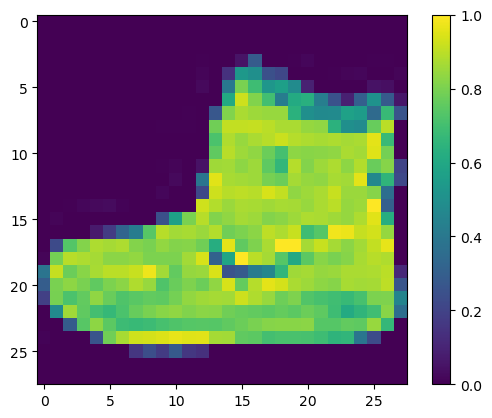

In [271]:
# labels show nr9 which is the catagory Ankle boots
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [273]:
# Define the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 2D outputs to 1D to pass it to the fully connected layers
    layers.Flatten(),
    
    # Fully Connected (Dense) Layer 1
    layers.Dense(256, activation='relu'),
    
    # Fully Connected (Dense) Layer 2
    layers.Dense(128, activation='relu'),
    
    # Output Layer with softmax for multi-class classification (10 classes in this case)
    layers.Dense(10, activation='softmax')
])

# Model summary to check the architecture
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,858 (1.77 MB)

 Trainable params: 462,858 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [275]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [277]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7494 - loss: 0.6844 - val_accuracy: 0.8534 - val_loss: 0.3984
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8795 - loss: 0.3296 - val_accuracy: 0.8850 - val_loss: 0.3169
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8966 - loss: 0.2750 - val_accuracy: 0.8682 - val_loss: 0.3604
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9102 - loss: 0.2361 - val_accuracy: 0.8984 - val_loss: 0.2757
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9225 - loss: 0.2062 - val_accuracy: 0.9071 - val_loss: 0.2601
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9284 - loss: 0.1842 - val_accuracy: 0.9106 - val_loss: 0.2592
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9391 - loss: 0.1616 - val_accuracy: 0.9088 - val_loss: 0.2551
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9467 - loss: 0.1412 - val_accuracy: 0

In [279]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2740
Test Accuracy: 0.9164999723434448


In [281]:
# Make predictions on the test set
predictions = model.predict(x_test)
print(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.8216550e-09 8.7523405e-10 1.1504702e-07 1.5392861e-09 6.4520944e-10
 1.0177983e-05 5.9548557e-09 1.7490398e-06 1.0594574e-09 9.9998796e-01]


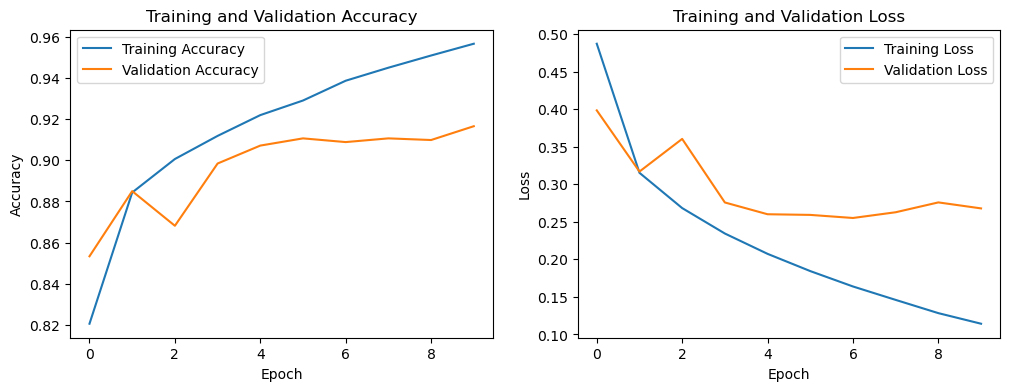

In [283]:

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


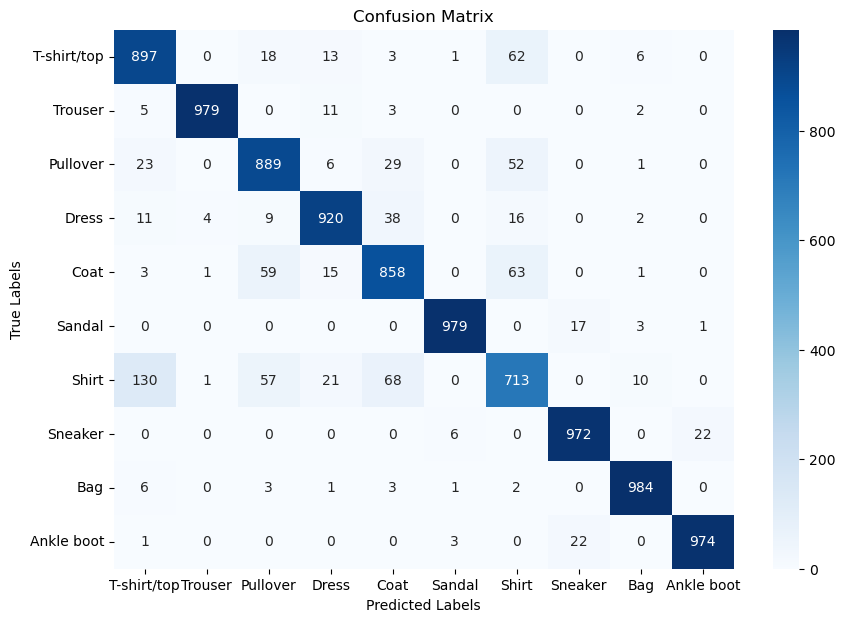

In [285]:
y_pred = model.predict(x_test)

# Convert predictions to class labels (if needed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [289]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# 1. Ensure the model is already trained and compiled

# 2. Make predictions on the test set
y_pred = model.predict(x_test)

# 3. Convert predictions to class labels (index of the highest probability)
y_pred_classes = np.argmax(y_pred, axis=1)

# 4. Convert y_test (true labels) to class labels (since y_test is one-hot encoded)
y_test_classes = np.argmax(y_test, axis=1)

# 5. Calculate accuracy, recall, and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes, average='macro')  # macro for multi-class
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')  # macro for multi-class

# 6. Print the performance metrics in a clean output format
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall (Macro Average): {recall * 100:.2f}%")
print(f"F1 Score (Macro Average): {f1 * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model Performance Metrics:
Accuracy: 91.65%
Recall (Macro Average): 91.65%
F1 Score (Macro Average): 91.60%
